In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/TCS.csv")

In [3]:
df.shape

(102, 83)

In [4]:
df.set_index(df.columns[0], inplace=True)

In [5]:
# df = df.T

In [6]:
df

,Mar 4,Jun 4,Sep 4,Dec 4,Mar 5,Jun 5,Sep 5,Dec 5,Mar 6,Jun 6,...,Mar 22,Jun 22,Sep 22,Dec 22,Mar 23,Jun 23,Sep 23,Dec 23,Mar 24,Jun 24
TCS,,,,,,,,,,,,,,,,,,,,,
Close,38.387501,87.250000,128.387497,166.932495,179.007507,169.762497,185.294998,212.857498,239.437500,217.345001,...,3739.949951,3267.100098,3004.550049,3256.699951,3205.899902,3302.25,3528.600098,3793.399902,3876.300049,3904.149902
Equity Share Capital,36.440000,36.440000,36.440000,36.440000,48.010000,48.010000,48.010000,48.010000,48.930000,48.930000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.00,366.000000,366.000000,362.000000,362.000000
Total Share Capital,36.440000,36.440000,36.440000,36.440000,48.010000,48.010000,48.010000,48.010000,48.930000,48.930000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.00,366.000000,366.000000,362.000000,362.000000
Reserves and Surplus,10.640000,10.640000,10.640000,10.640000,3273.040000,3273.040000,3273.040000,3273.040000,5560.400000,5560.400000,...,76807.000000,76807.000000,76807.000000,76807.000000,74172.000000,74172.00,74172.000000,74172.000000,71758.000000,71758.000000
Total Reserves and Surplus,10.640000,10.640000,10.640000,10.640000,3273.040000,3273.040000,3273.040000,3273.040000,5560.400000,5560.400000,...,76807.000000,76807.000000,76807.000000,76807.000000,74172.000000,74172.00,74172.000000,74172.000000,71758.000000,71758.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P/L Before Tax,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,...,12626.000000,11400.000000,13303.000000,13942.000000,13045.000000,13932.00,14444.000000,14046.000000,15180.000000,15878.000000
Tax,66.830000,66.830000,76.980000,82.780000,53.910000,93.430000,90.540000,88.340000,50.050000,79.410000,...,2831.000000,2812.000000,3244.000000,3283.000000,3245.000000,3448.00,3515.000000,3293.000000,3787.000000,3763.000000
P/L After Tax from Ordinary Activities,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,...,9795.000000,8588.000000,10059.000000,10659.000000,9800.000000,10484.00,10929.000000,10753.000000,11393.000000,12115.000000


In [7]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [8]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [9]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 13s 2s/step - loss: 0.0402 - val_loss: 0.1034
Epoch 2/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0073 - val_loss: 0.0197
Epoch 3/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0135 - val_loss: 0.0311
Epoch 4/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0118 - val_loss: 0.0171
Epoch 5/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0045 - val_loss: 0.0373
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0046 - val_loss: 0.0615
Epoch 7/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0071 - val_loss: 0.0614
Epoch 8/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0067 - val_loss: 0.0429
Epoch 9/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0042 - val_loss: 0.0241
Epoch 10/50
2/2 [==============================] - 0s 71ms/step - loss: 0.0029 - val_loss: 0.0184
Epoch 11/50
2/2 [=============

In [13]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [14]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [15]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [17]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [18]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 41ms/step


In [19]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [20]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

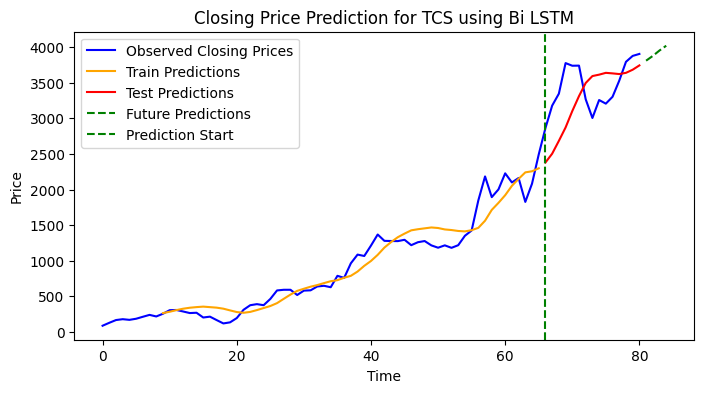

In [21]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction for TCS using Bi LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 421.9295247395833
Mean Squared Error (MSE): 230208.86684143543
Root Mean Squared Error (RMSE): 479.80086165140995
Mean Absolute Percentage Error (MAPE): 12.48112739778475%
